In [7]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from src.preprocessing import load_raw_data

df = load_raw_data("station_day.csv")
df.head()

/workspaces/urban-air-quality-index-predictor/src/preprocessing.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[features] = df[features].interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill')


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
20277,NaN,1420070400000000000,200.96,607.980,17.06,12.39,24.73,42.980000,21.82,8.910000,143.840,9.19,14.160,9.840,364.0,NaN
11906,NaN,1420070400000000000,425.49,607.980,49.37,40.91,90.29,44.840000,0.69,7.850000,143.840,9.19,14.160,9.840,579.0,NaN
20278,NaN,1420156800000000000,251.12,438.765,26.02,17.12,31.50,46.700000,13.29,6.790000,110.915,6.60,10.175,7.065,410.0,NaN
11907,NaN,1420156800000000000,172.13,269.550,22.97,40.98,63.94,44.543333,1.35,6.293333,77.990,4.01,6.190,4.290,497.0,NaN
11908,NaN,1420243200000000000,84.42,131.900,10.17,40.89,51.06,42.386667,1.54,5.796667,57.480,1.86,2.870,1.990,141.0,NaN


In [3]:
from src.config import POLLUTANTS
print(POLLUTANTS)

['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'NH3']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87025 entries, 20277 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   0 non-null      float64
 1   Date        87025 non-null  int64  
 2   PM2.5       87025 non-null  float64
 3   PM10        87025 non-null  float64
 4   NO          87025 non-null  float64
 5   NO2         87025 non-null  float64
 6   NOx         87025 non-null  float64
 7   NH3         87025 non-null  float64
 8   CO          87025 non-null  float64
 9   SO2         87025 non-null  float64
 10  O3          87025 non-null  float64
 11  Benzene     87025 non-null  float64
 12  Toluene     87025 non-null  float64
 13  Xylene      87025 non-null  float64
 14  AQI         87025 non-null  float64
 15  AQI_Bucket  0 non-null      float64
dtypes: float64(15), int64(1)
memory usage: 11.3 MB


In [6]:
df.describe()


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,0.0,8.702500e+04,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,0.0
mean,NaN,1.543050e+18,80.448256,162.293881,23.133774,35.058037,43.461057,29.400587,1.625754,12.292393,38.588776,3.572404,16.416350,2.743136,179.749290,NaN
std,NaN,4.021581e+16,75.625627,120.623041,34.421246,28.911475,45.370626,23.090437,4.235598,12.230453,38.941127,10.944997,28.165477,5.768680,131.324339,NaN
min,NaN,1.420070e+18,0.040000,0.030000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000,NaN
25%,NaN,1.524096e+18,32.130000,75.440000,4.830000,15.220000,15.580000,13.970000,0.610000,5.290000,19.460000,0.360000,1.530000,0.220000,86.000000,NaN
50%,NaN,1.551658e+18,56.360000,128.810000,10.250000,27.230000,28.330000,24.810000,0.960000,9.235000,31.310000,1.516667,6.240000,0.983636,132.000000,NaN
75%,NaN,1.574294e+18,100.510000,214.535000,24.820000,46.690000,52.950000,38.150000,1.480000,15.035000,47.455000,3.830000,19.670000,3.006667,254.000000,NaN
max,NaN,1.593562e+18,1000.000000,976.770000,437.850000,448.050000,434.900000,365.680000,175.810000,186.080000,963.000000,455.030000,454.850000,170.370000,2049.000000,NaN


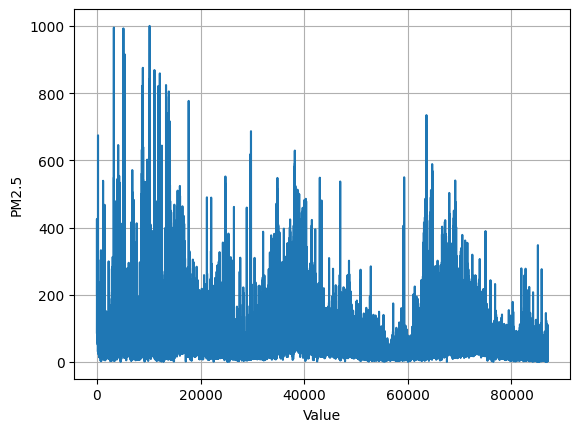

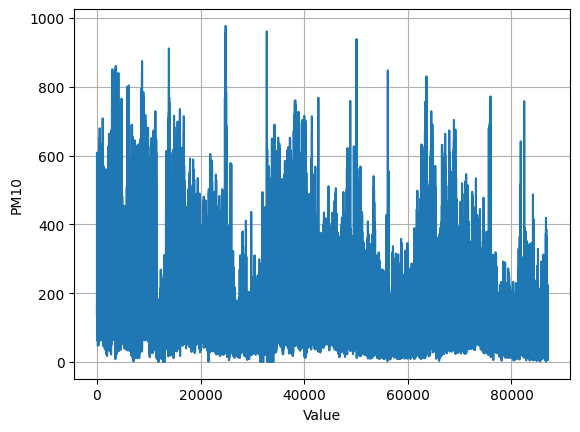

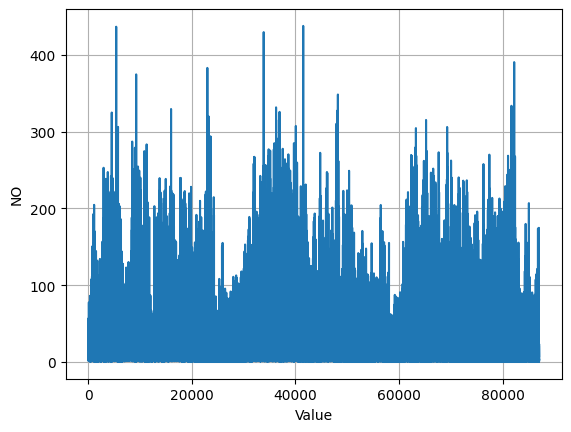

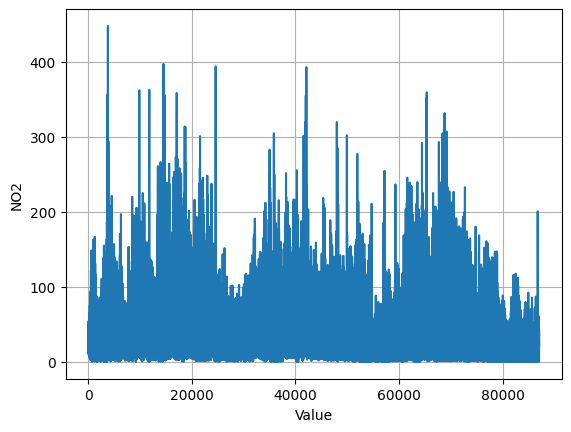

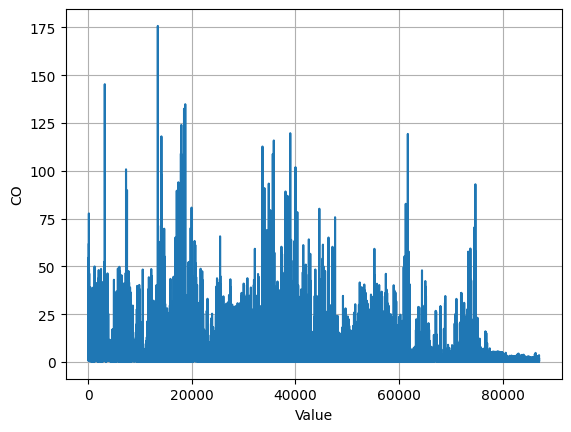

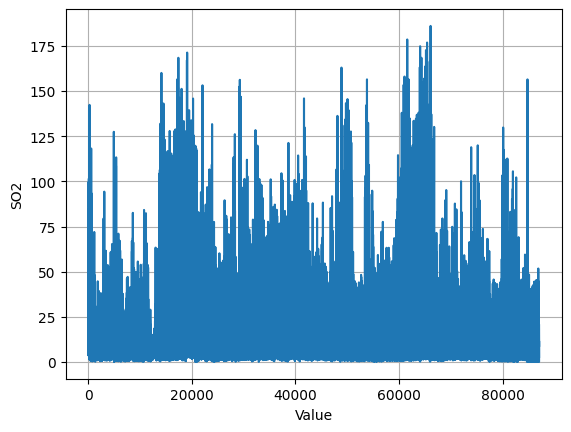

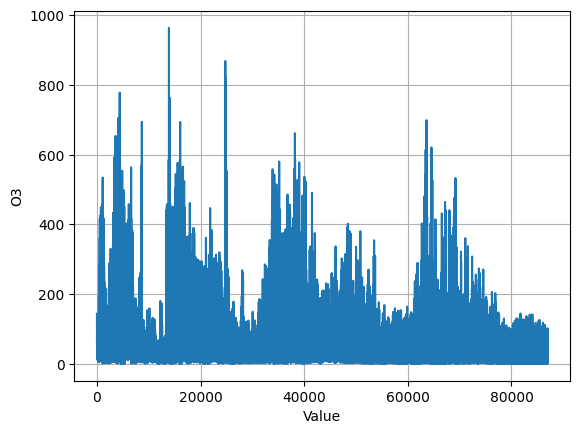

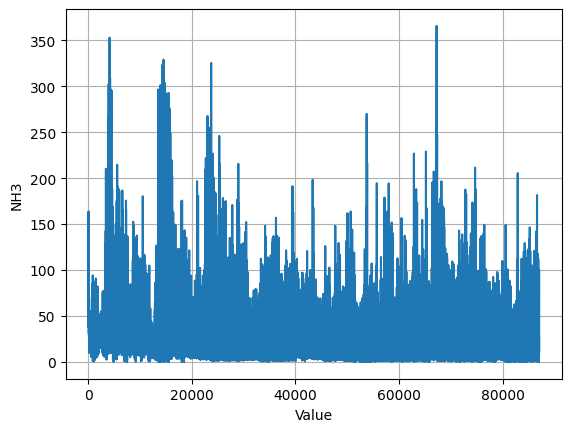

In [18]:
time=np.linspace(0,len(df),len(df)) 
for feature in POLLUTANTS:
    mp.plot(time,df[feature])
    mp.ylabel(feature)
    mp.xlabel("Value")
    mp.grid()
    mp.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

for col in df[POLLUTANTS]:
    result = adfuller(df[col].dropna())
    print(f"{col}: p-value = {result[1]}")

PM2.5: p-value = 1.5528625741680372e-12
PM10: p-value = 1.5855856327910267e-17
NO: p-value = 2.0322827400879837e-23
NO2: p-value = 6.399269882538721e-18
CO: p-value = 3.531810967596273e-30
SO2: p-value = 3.5847672027262344e-30
O3: p-value = 2.303939420822864e-27
NH3: p-value = 1.0691412363293099e-27


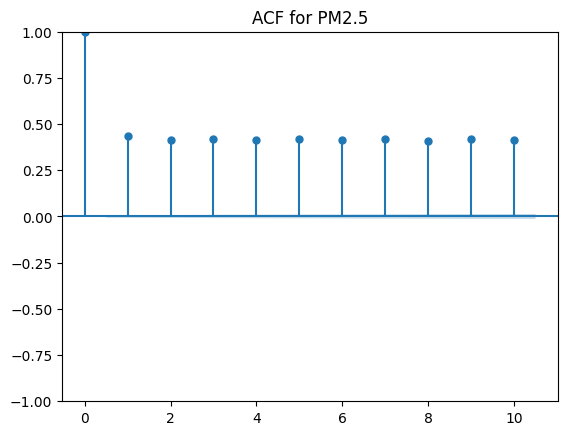

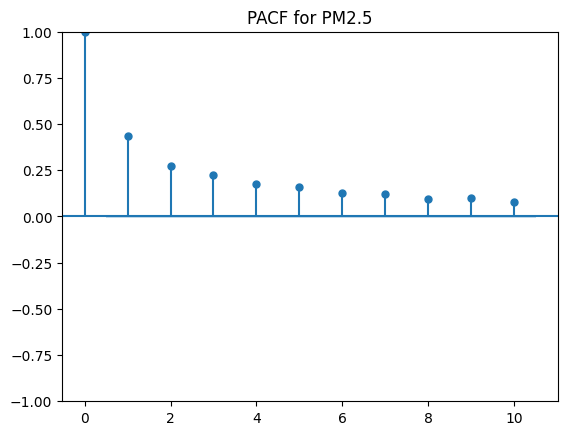

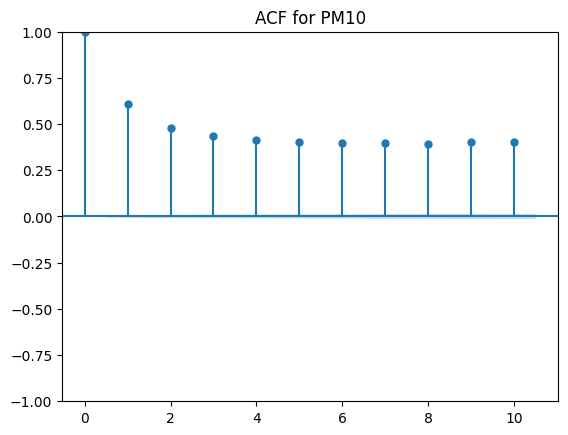

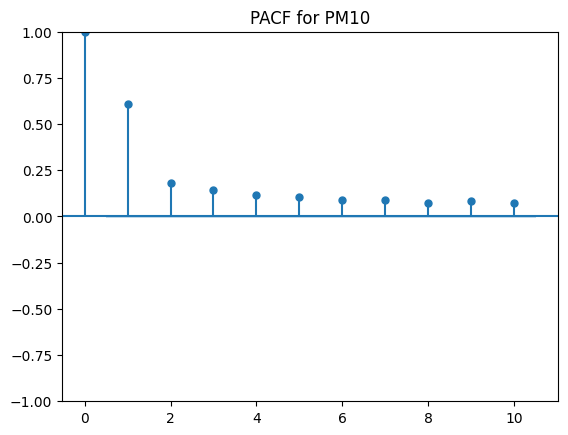

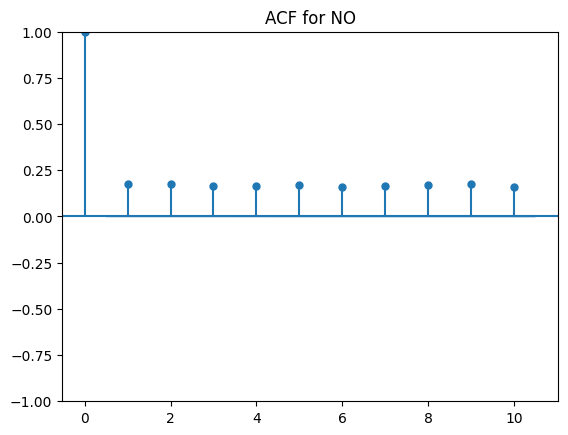

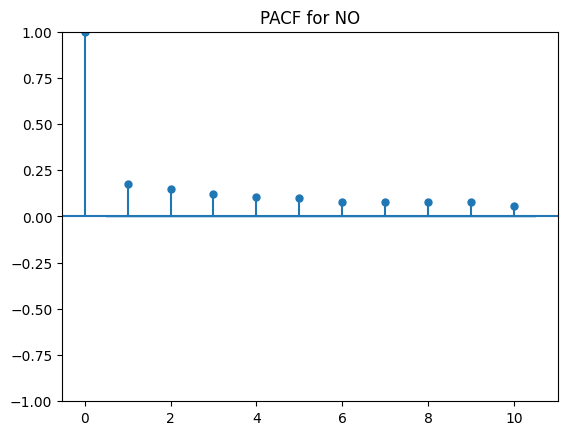

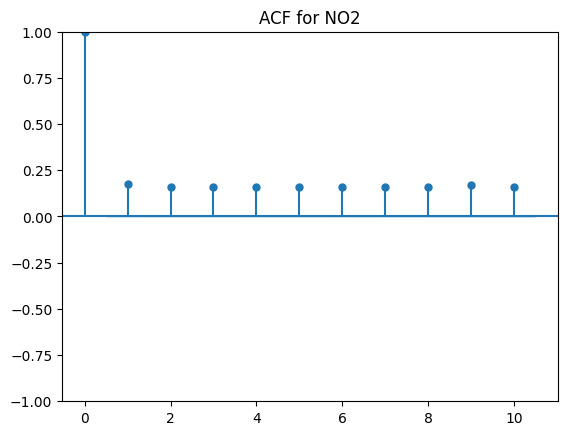

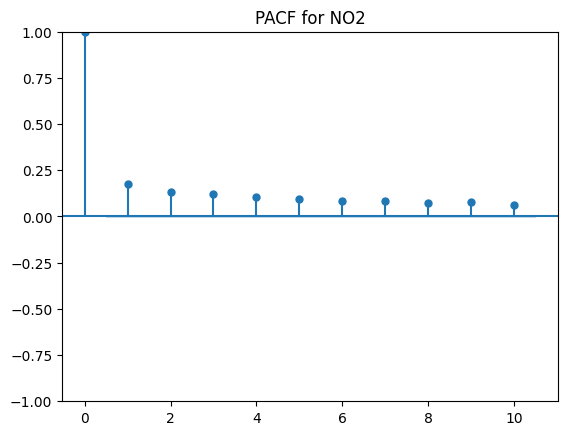

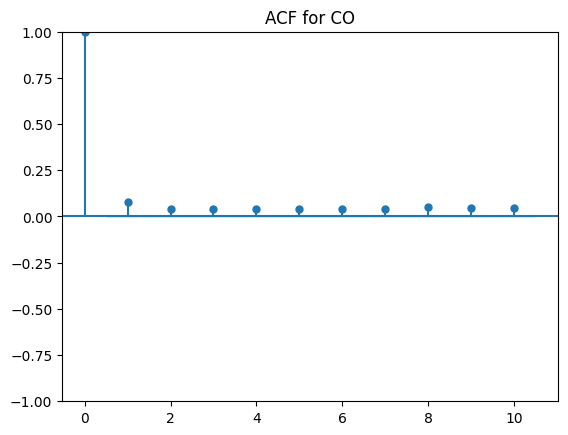

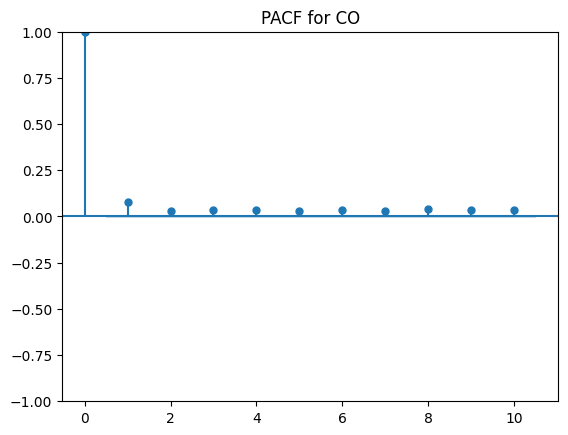

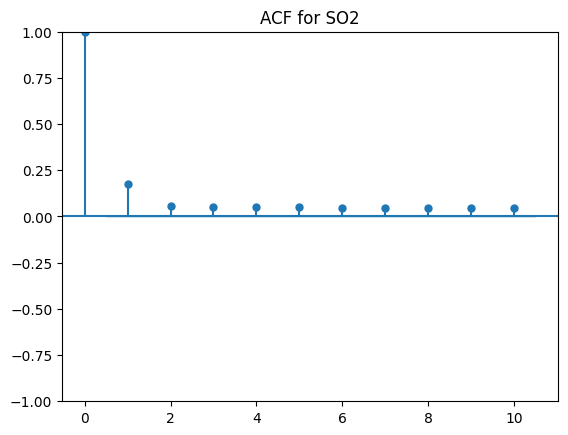

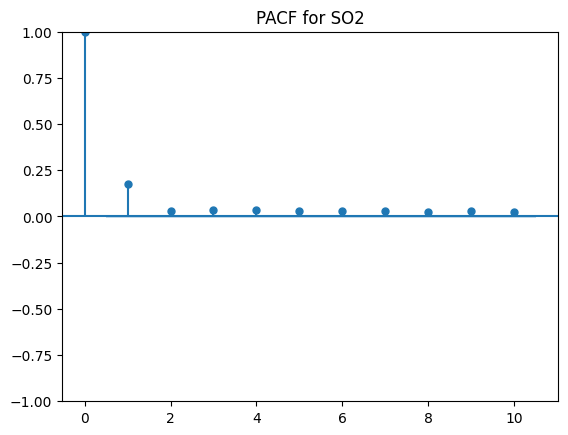

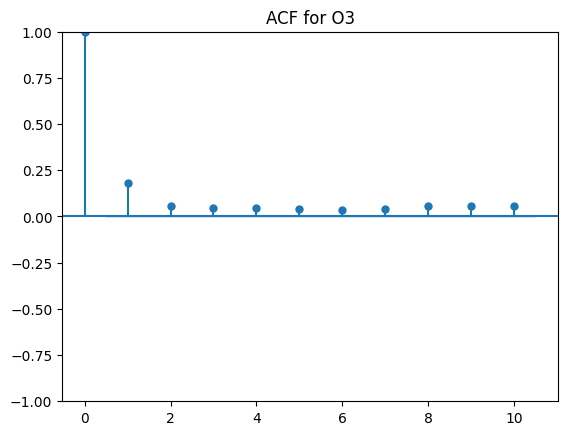

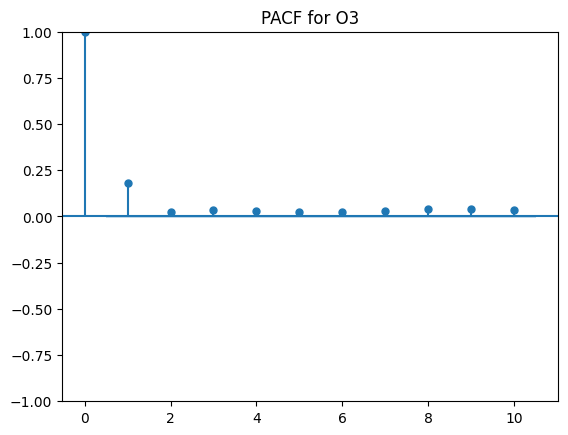

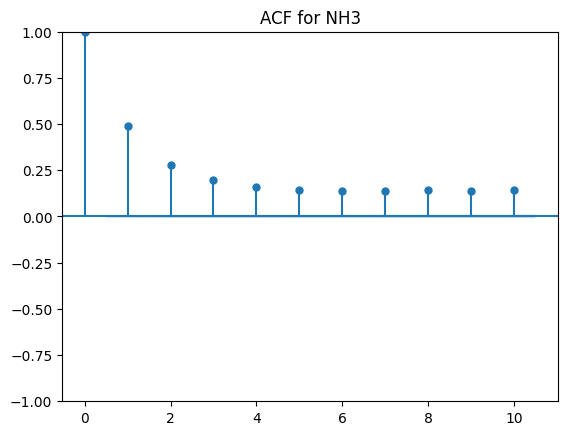

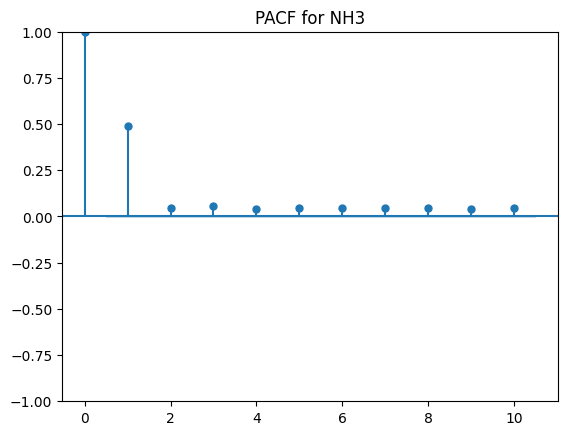

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for feature in df[POLLUTANTS]:
    plot_acf(df[feature].dropna(), lags=10)
    mp.title(f"ACF for {feature}")
    mp.show()

    plot_pacf(df[feature].dropna(), lags=10)
    mp.title(f"PACF for {feature}")
    mp.show()

PACF spikes at 1 lag for almost all features

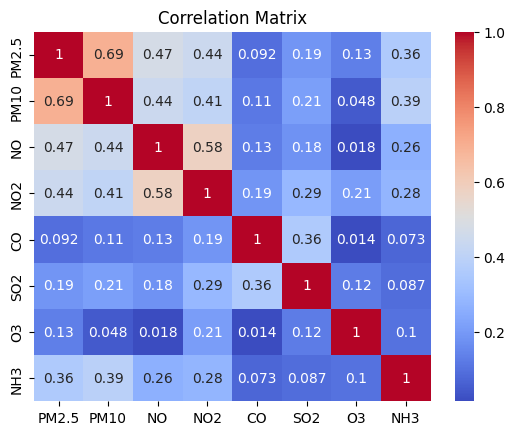

In [24]:
import seaborn as sns

sns.heatmap(df[POLLUTANTS].corr(), annot=True, cmap='coolwarm')
mp.title("Correlation Matrix")
mp.show()